# Python Projet 5 - Exploration et nettoyage des données 


Dans le cadre du cours OpenClassrooms Machine Learning et du projet d'évaluation #5, ce notebook présente l'analyse exploratoire ainsi qu'un rapide nettoyage des données du dataset pour déterminer quelles variables pourraient être intéressantes pour la suite. 

Author : Vincent Arrigoni, 04/2023 

Regexp : https://www.debuggex.com/cheatsheet/regex/python

Tout savoir :https://datascientest.com/regex-tout-savoir

Test regexp : https://regex101.com/

## Nettoyage des données 

Extract procedure on Stack Exchange Explorer

```
SELECT TOP 5000 Title, Body, Tags, Id, Score, ViewCount, AnswerCount, CommentCount
FROM Posts 
WHERE PostTypeId = 1 AND ViewCount > 10 AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5
```


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.utils import shuffle

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/OCS/Projet5/QueryResults.csv')

In [ ]:
ds.isnull().sum()

Title           0
Body            0
Tags            0
Id              0
Score           0
ViewCount       0
AnswerCount     0
CommentCount    0
dtype: int64

In [ ]:
ds = ds.dropna()
ds = shuffle(ds)
ds.describe()

In [ ]:
ds.head(10)

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CommentCount
0,how do I calculate a rolling idxmax,<p>consider the <code>pd.Series</code> <code>s...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,6,0
1,Object-Oriented Callbacks for C++?,<p>Is there some library that allows me to eas...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,6,2
2,TDD and ADO.NET Entity Framework,<p>I've been playing with ADO.NET Entity Frame...,<unit-testing><entity-framework><ado.net><tdd>...,316897,18,9688,6,1
3,Better techniques for trimming leading zeros i...,"<p>I've been using <a href=""https://stackoverf...",<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,19,3
4,"""No X11 DISPLAY variable"" - what does it mean?",<p>I am trying to install a Java application o...,<java><linux><variables><x11><headless>,662421,122,622820,12,2
5,Why doesn't .NET find the OpenSSL.NET dll?,"<p><strong>EDIT</strong> (the whole question, ...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,12,4
6,Iterating through/Parsing JSON Object via Java...,<p>I'm having a problem with jQuery/Ajax/JSON....,<javascript><json><jquery><parsing><loops>,1637334,10,76742,4,2
7,Class inherited from class without default con...,<p>Right now I have a class <code>A</code> tha...,<c++><class><inheritance><constructor><default...,3714162,12,23294,2,3
8,libxml2 vs expat for an XMPP server,<p>I'm trying to create an XMPP library (and l...,<c><go><xmpp><libxml2><expat-parser>,3714184,7,8496,1,0
9,Implications of deploying a Debug build of an ...,<p>I would like to know the pros and cons for ...,<c#><security><debugging><deployment><compiler...,3714213,7,1611,2,1


In [ ]:
data =pd.DataFrame()
data['Text'] = ds[['Title', 'Body']].copy().apply("".join, axis=1)
data['Tags'] = ds['Tags'].copy()

## Tokenisation, suppression des stopwords, stemming du texte et listage des tags

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
# nltk.word_tokenize(data.loc[0,'Text'].lower()) # basic tokenization with only lower case letter
tokenizer = nltk.RegexpTokenizer(r'(?:C\+\+)|(?:c\+\+)|(?:c\#)|(?:C\#)|(?:\.net)|(?:\.NET)|\w{2,}') 
# tokenization keeping only two-letters-or-more words with only lower case letter and other specific expression for code language

data['Token'] = ['' for i in range(len(data))]
data['Tags_lst'] = ['' for i in range(len(data))]
data['Tags_lst_new'] = ['' for i in range(len(data))]
for i in range(len(data)):
  text = data.loc[i,'Text'].lower() # .lower() pour ne garder que les minuscules
  text = re.sub(r'<[^>]*>',' ', text) # suppression des bornes html
  text = tokenizer.tokenize(text) # tokenisation
  texty = []
  for wrd in text:
    if not wrd in stop_words and not wrd.isnumeric():
      texty.append(stemmer.stem(wrd))
  data.at[i,'Token'] = texty

  data.at[i,'Tags_lst'] = list(filter(None, re.split(r'<|>' ,data.loc[i, 'Tags'])))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<Axes: title={'center': '38921 most common words used in Stack OverFlow questions'}>

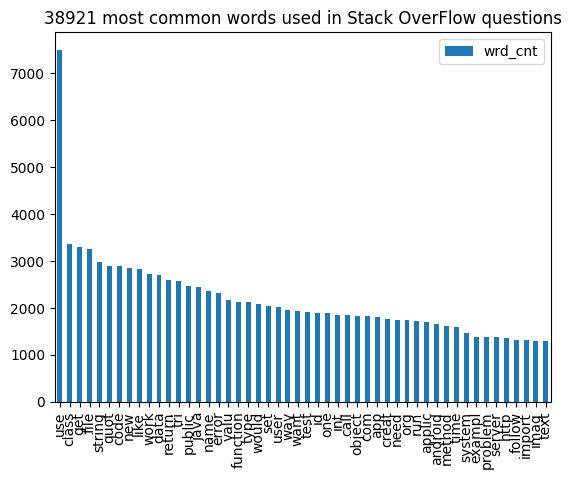

In [ ]:
# Recensement des fréquences de mots et suppression des mots trop courants (utilisés pour le code informatique) 

string = []
for txt in data['Token']:
  for wrd in txt:
    string.append(wrd)
freq = nltk.FreqDist(string)

for i in range(len(data['Token'])):
  token_lst = data.loc[i,'Token']
  token_red_lst = []
  for wrd in token_lst:
    if not wrd == 'gt' and not wrd == 'lt' : # semblable à max_df de count_vectorizer ? 
      token_red_lst.append(wrd)
    data.at[i,'Token_lst_new'] = token_red_lst

string = []
for txt in data['Token_lst_new']:
  for wrd in txt:
    string.append(wrd)
freq_red = nltk.FreqDist(string)

df = pd.DataFrame.from_dict(freq_red, orient='index')
df.rename(columns={0:'wrd_cnt'}, inplace=True)
df.sort_values(by='wrd_cnt',ascending=False)[:50].plot(kind='bar', title='{} most common words used in Stack OverFlow questions'.format(len(freq_red)))

<Axes: title={'center': '54 most common tags used in Stack OverFlow questions'}>

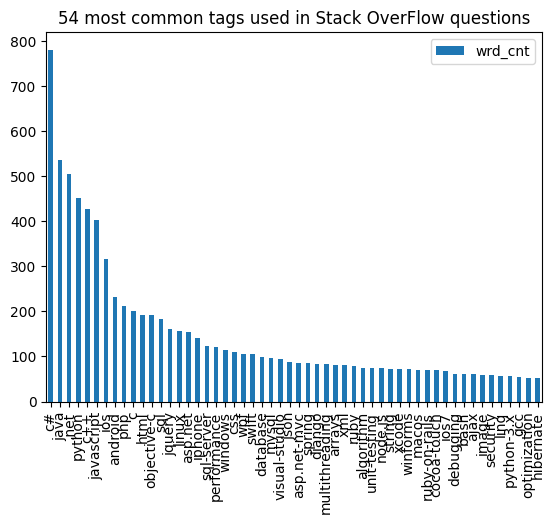

In [ ]:
# Recensement des fréquences de tags et suppression des tags trop rares 
# pour qu'un modèle puisse avoir suffisamment d'exemples pour apprendre à repérer leur cas

string = []
for txt in data['Tags_lst']:
  for wrd in txt:
    string.append(wrd)
freq = nltk.FreqDist(string)

freq_min = 10 / len(data['Tags_lst'])
# Keep only the tags appearing in at least 5% of posts 
# So the model has sufficient info to predict the target tag 
for i in range(len(data['Tags_lst'])):
  tag_lst = data.loc[i,'Tags_lst']
  tag_min_lst = []
  for wrd in tag_lst:
    if freq.freq(wrd) > freq_min :
      tag_min_lst.append(wrd)
    data.at[i,'Tags_lst_new'] = tag_min_lst

string = []
for txt in data['Tags_lst_new']:
  for wrd in txt:
    string.append(wrd)
freq_red = nltk.FreqDist(string)

df = pd.DataFrame.from_dict(freq_red, orient='index')
df.rename(columns={0:'wrd_cnt'}, inplace=True)
df.sort_values(by='wrd_cnt',ascending=False)[:].plot(kind='bar', title='{} most common tags used in Stack OverFlow questions'.format(len(freq_red)))

In [ ]:
data

,Text,Tags,Token,Tags_lst,Tags_lst_new,Token_lst_new
0,how do I calculate a rolling idxmax<p>consider...,<python><pandas><numpy><dataframe><series>,"[calcul, roll, idxmax, consid, pd, seri, impor...","[python, pandas, numpy, dataframe, series]",[python],"[calcul, roll, idxmax, consid, pd, seri, impor..."
1,Object-Oriented Callbacks for C++?<p>Is there ...,<c++><oop><callback><pointer-to-member><eiffel>,"[object, orient, callback, c++, librari, allow...","[c++, oop, callback, pointer-to-member, eiffel]",[c++],"[object, orient, callback, c++, librari, allow..."
2,TDD and ADO.NET Entity Framework<p>I've been p...,<unit-testing><entity-framework><ado.net><tdd>...,"[tdd, ado, .net, entiti, framework, play, ado,...","[unit-testing, entity-framework, ado.net, tdd,...",[unit-testing],"[tdd, ado, .net, entiti, framework, play, ado,..."
3,Better techniques for trimming leading zeros i...,<sql><sql-server><sql-server-2005><tsql><string>,"[better, techniqu, trim, lead, zero, sql, serv...","[sql, sql-server, sql-server-2005, tsql, string]","[sql, sql-server, string]","[better, techniqu, trim, lead, zero, sql, serv..."
4,"""No X11 DISPLAY variable"" - what does it mean?...",<java><linux><variables><x11><headless>,"[x11, display, variabl, mean, tri, instal, jav...","[java, linux, variables, x11, headless]","[java, linux]","[x11, display, variabl, mean, tri, instal, jav..."
...,...,...,...,...,...,...
4995,"Visual Studio 2019: ""This site can’t provide a...",<visual-studio><asp.net-core><localhost><visua...,"[visual, studio, site, provid, secur, connect,...","[visual-studio, asp.net-core, localhost, visua...",[visual-studio],"[visual, studio, site, provid, secur, connect,..."
4996,TripleDES 16 Byte not working<p>I am trying to...,<c#><.net><cryptography><.net-core><tripledes>,"[tripled, byte, work, tri, migrat, project, .n...","[c#, .net, cryptography, .net-core, tripledes]","[c#, .net]","[tripled, byte, work, tri, migrat, project, .n..."
4997,Is there a way to debug a subprocess using pyd...,<python><eclipse><debugging><pydev><waf>,"[way, debug, subprocess, use, pydev, use, ecli...","[python, eclipse, debugging, pydev, waf]","[python, debugging]","[way, debug, subprocess, use, pydev, use, ecli..."
4998,Tooltip for each row in data table<p>This ques...,<jsf-2><primefaces><datatable><tooltip><primef...,"[tooltip, row, data, tabl, question, scream, d...","[jsf-2, primefaces, datatable, tooltip, primef...",[],"[tooltip, row, data, tabl, question, scream, d..."


In [ ]:
data.to_csv('/content/drive/MyDrive/OCS/Projet5/msg_preprocessed.csv')

## Réduction dimensionnelle - Topic modeling avec analyse non supervisée 

Latent Dirichlet Allocation 

nécessite de lui donner le nb de topics à rechercher 
-> à lancer plusieurs fois pour trouver le nb de topics optimum 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(data['Text'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title, nb_hor, nb_vert):
    fig, axes = plt.subplots(nb_vert, nb_hor, figsize=(30, 15), sharex=False)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.35)
    plt.show()

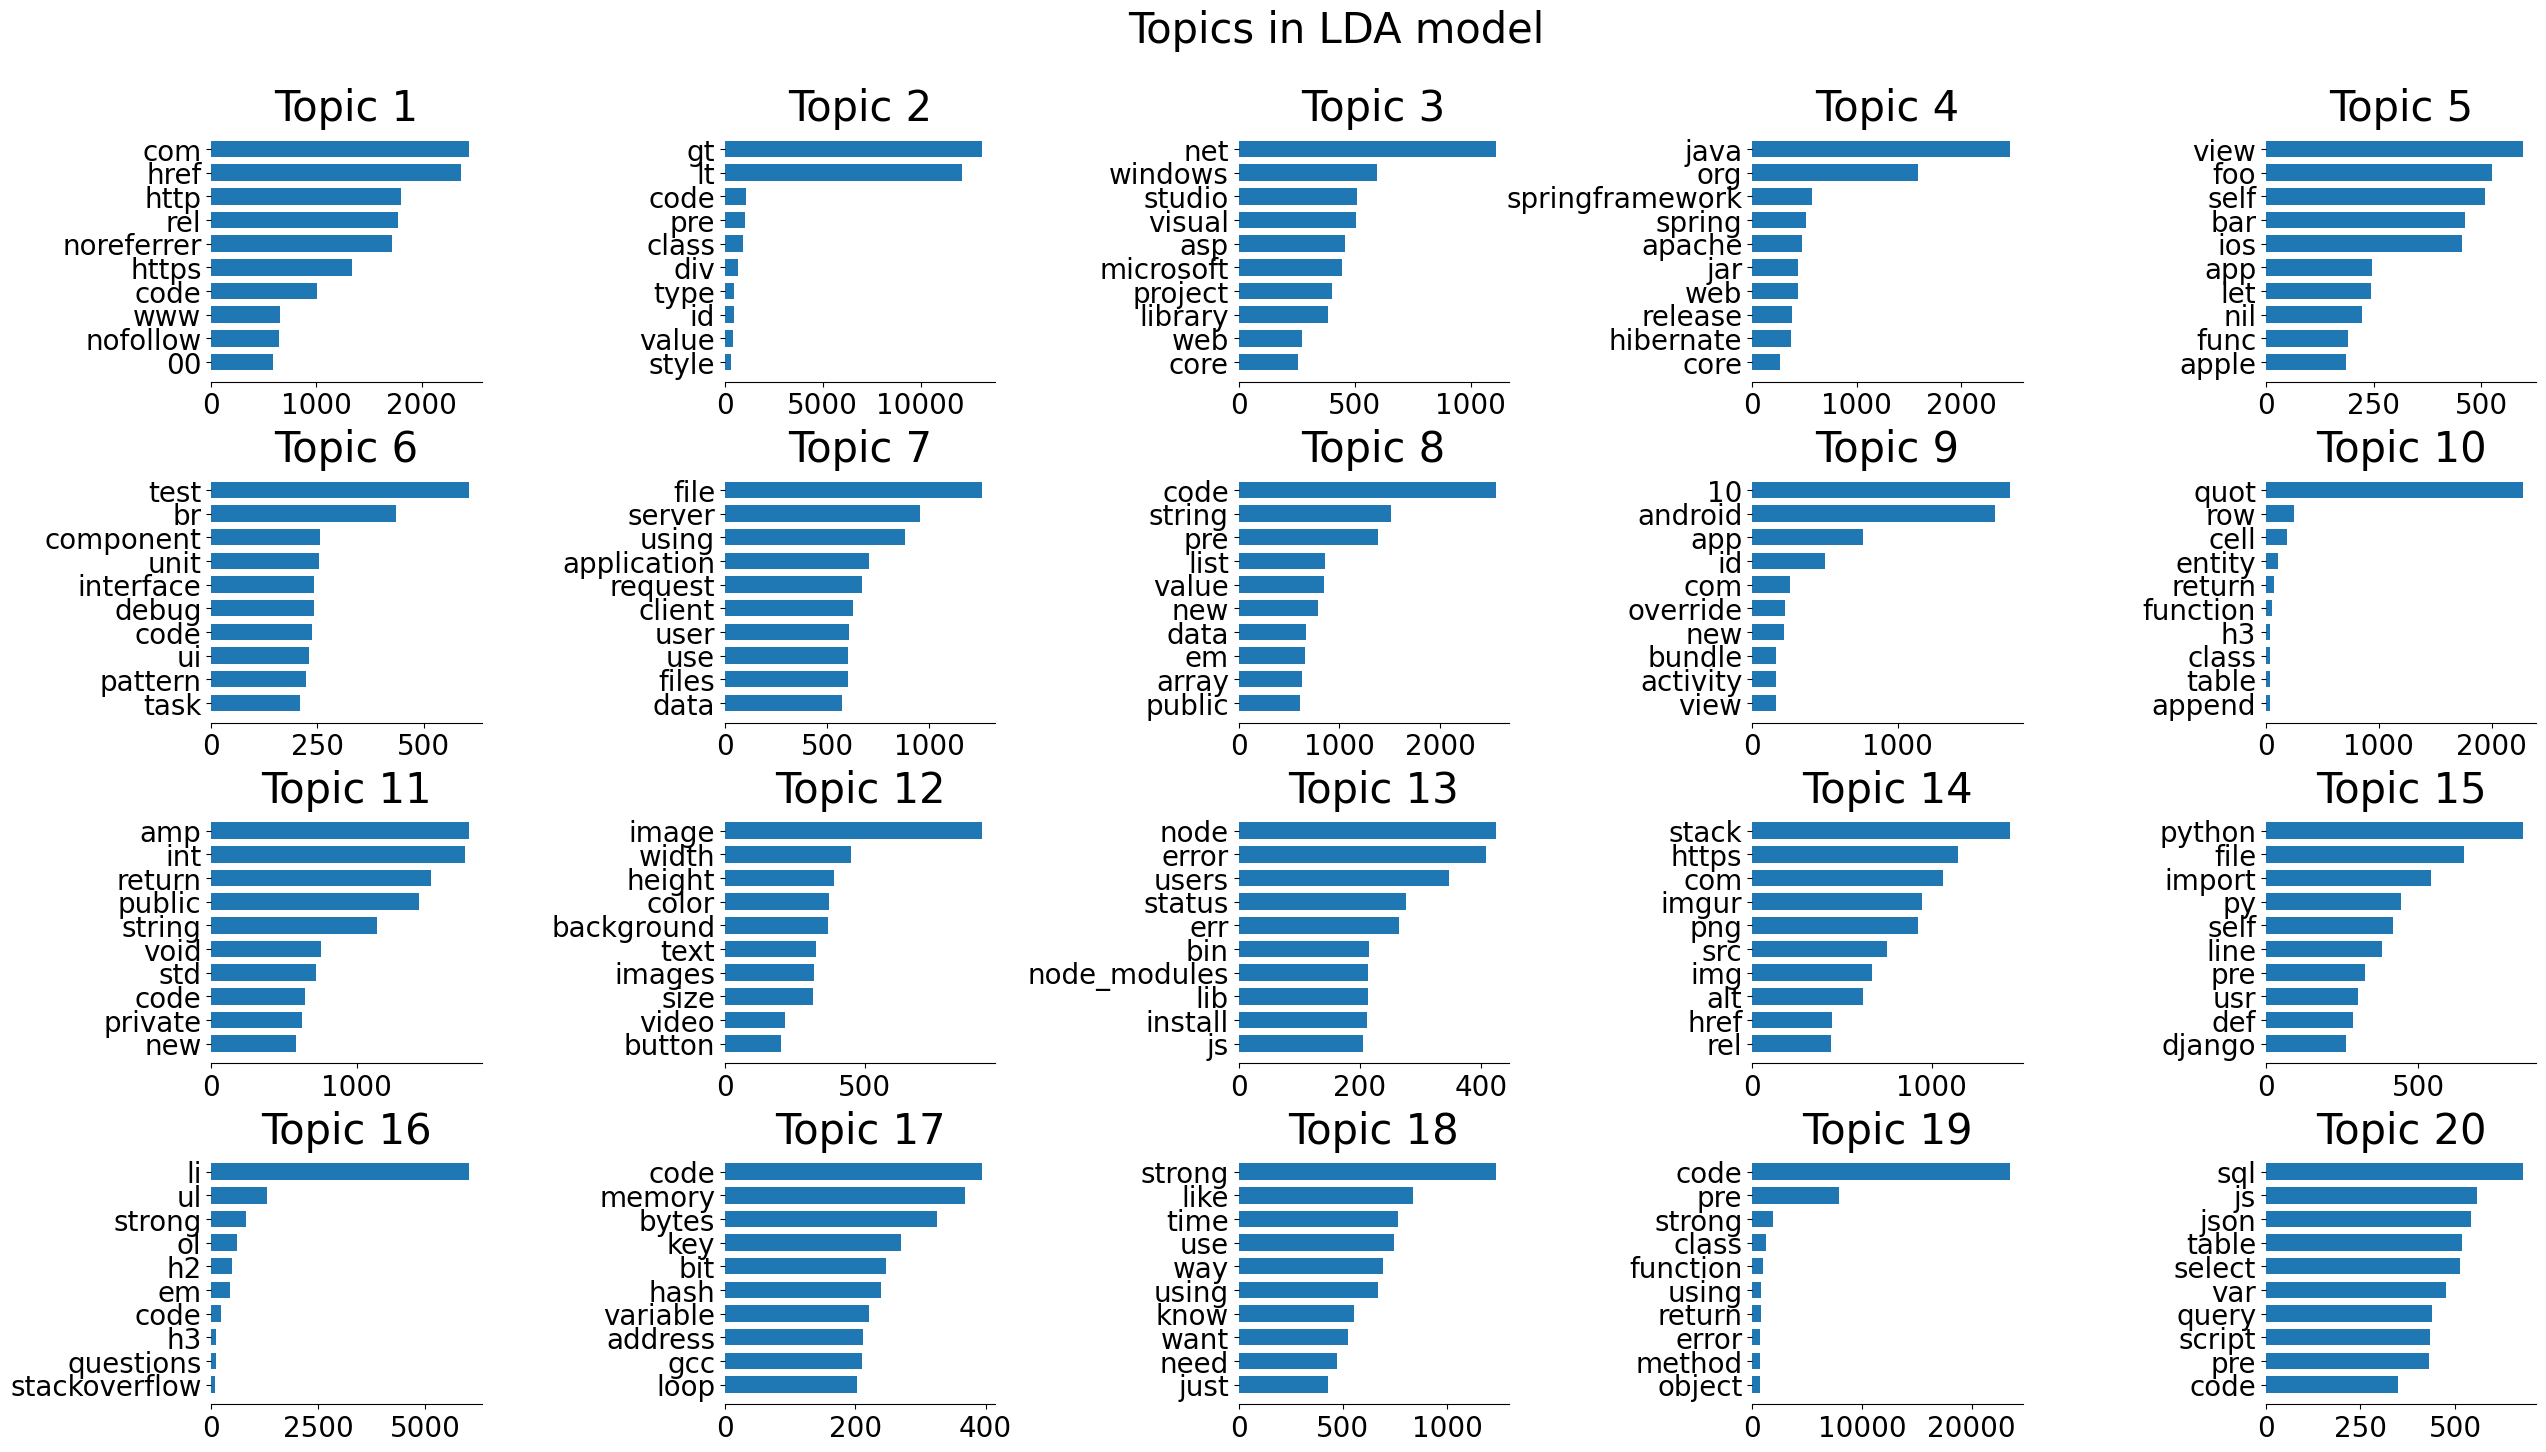

In [ ]:
plot_top_words(lda, tf_vectorizer.get_feature_names_out(), 10, 'Topics in LDA model', 5, 4)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tf_vectorizer.get_feature_names_out(), 10)

Topic 0:
com href http rel noreferrer https code www nofollow 00
Topic 1:
gt lt code pre class div type id value style
Topic 2:
net windows studio visual asp microsoft project library web core
Topic 3:
java org springframework spring apache jar web release hibernate core
Topic 4:
view foo self bar ios app let nil func apple
Topic 5:
test br component unit interface debug code ui pattern task
Topic 6:
file server using application request client user use files data
Topic 7:
code string pre list value new data em array public
Topic 8:
10 android app id com override new bundle activity view
Topic 9:
quot row cell entity return function h3 class table append
Topic 10:
amp int return public string void std code private new
Topic 11:
image width height color background text images size video button
Topic 12:
node error users status err bin node_modules lib install js
Topic 13:
stack https com imgur png src img alt href rel
Topic 14:
python file import py self line pre usr def django
Topic 15

In [ ]:
lda.components_

array([[5.88423127e+02, 5.11121983e-02, 2.96081711e+02, ...,
        5.14981492e-02, 5.22611609e-02, 4.44748977e+00],
       [5.18594075e-02, 7.20916513e-02, 7.80909034e-01, ...,
        1.16815208e+02, 1.79513393e+01, 3.76711559e+00],
       [5.13323336e-02, 5.08625333e-02, 5.35632590e-02, ...,
        5.13589472e-02, 1.47881661e+01, 5.15921181e-02],
       ...,
       [5.12447110e-02, 5.09572297e-02, 6.73934063e-02, ...,
        5.11887631e-02, 1.30848355e+01, 5.52205999e-02],
       [5.35246993e-02, 8.96424669e-02, 7.67286325e-02, ...,
        5.08987869e-02, 2.25120116e+01, 1.81497837e+01],
       [5.17942753e-02, 5.09018749e-02, 5.14976712e-02, ...,
        9.46742547e-01, 2.72356446e-01, 6.52069373e-02]])